# How to use Metadata Editor

In [1]:
from pymetadataeditor import MetadataEditor

## Examples of the interface

In [2]:
your_api_key = "<your api key here>"
me = MetadataEditor(your_api_key)

### Listing your projects

In [3]:
me.list_projects().iloc[10:]

,type,idno,study_idno,title,abbreviation,nation,year_start,year_end,published,created,changed,varcount,created_by,changed_by,is_shared,thumbnail,template_uid,username,username_cr,collections
id,,,,,,,,,,,,,,,,,,,,


### Creating a new project

In [5]:
series_description = {
                        "idno": "GB20240617_demo1",
                        "doi": "V1",
                        "name": "Version 1",
                        "display_name": "Version 1"
                     }

me.create_timeseries(idno="GB20240617_demo1",
                     series_description=series_description)

In [7]:
me.list_projects().iloc[10:]

,type,idno,study_idno,title,abbreviation,nation,year_start,year_end,published,created,changed,varcount,created_by,changed_by,is_shared,thumbnail,template_uid,username,username_cr,collections
id,,,,,,,,,,,,,,,,,,,,
2659,timeseries,GB20240617_demo1,GB20240617_demo1,Version 1,None,,0,0,None,2024-06-17T08:49:32-04:00,2024-06-17T08:49:32-04:00,None,63,63,None,None,30ab32c7d62aa6e2801efcf336658dbb,Gordon Blackadder,Gordon Blackadder,[]


In [8]:
me.get_project_by_id(2659)['metadata']

{'idno': 'GB20240617_demo1',
 'series_description': {'idno': 'GB20240617_demo1',
  'doi': 'V1',
  'name': 'Version 1',
  'display_name': 'Version 1'},
 'changed_by': '63',
 'changed': '1718628572'}

### Updating an existing project

In [3]:
updated_series_description= {
                "idno": "GB20240617_demo1",
                "doi": "V2",
                "name": "Version 2",
                "display_name": "Version 2",
                "authoring_entity": [{"name": "example agency"}]
                }

me.update_timeseries_by_id(2659, series_description=updated_series_description)

In [4]:
me.get_project_by_id(2659)['metadata']

{'idno': 'GB20240617_demo1',
 'series_description': {'idno': 'GB20240617_demo1',
  'doi': 'V2',
  'name': 'Version 2',
  'display_name': 'Version 2',
  'authoring_entity': [{'name': 'example agency'}]},
 'changed_by': '63',
 'changed': '1718628895'}

## Explanatory Error Messages

### When the api key is invalid

In [2]:
api_key = "bad_key"
me_bad = MetadataEditor(api_key)
me_bad.list_projects()

PermissionError: Access Denied. Check that the API key 'bad_key' is correct

### When required data is missing or the type is incorred

In [3]:
series_description = {
                        "idno": 17,
                        "doi": "demoV1",
                     }

me.create_timeseries(idno="GB20240617_demo3",
                     series_description=series_description)

ValueError: 
string_type: series_description.idno input should be a valid string
missing: series_description.name field required

### When the id is incorrect

In [4]:
series_description= {
                "idno": "GB20240617_demo1",
                "doi": "V2",
                "name": "Version 2",
                "display_name": "Version 2",
                "authoring_entity": [{"name": "example agency"}]
                }

me.update_timeseries_by_id(1,
                           series_description=series_description)

PermissionError: Access Denied. Check that the id '1' is correct

## Help defining valid metadata

Instead of passing in dictionaries (indeed dictionaries of dictionaries of dictionaries), we can use predefined objects that help identify which fields are required and the data type of each field. These can be passed to the create and update functions just like dictionaries.

We have defined objects for each field within the timeseries schema:

* metadata information
    * producers
    * version statement
* series description
    * authoring entity
    * version statement
    * alias
    * alternate identifier
    * language
    * dimension
    * references used for definition references, statistical concept references, methodology references, derivation references, imputation references, aggregation method references
    * concept
    * data collection
    * theme
    * topic
    * discipline
    * mandata
    * time period
    * ref country
    * geographic unit
    * bbox
    * license
    * links
    * api documentation
    * sources
        * other identifiers
        * author
            * author id
        * dataset
    * keyword
    * acronym
    * errata
    * acknowledgement
    * note
    * related indicator
    * compliance
    * framework
    * series group
    *contact
* datacite
    * creator
    * title
    * type
* provenance
    * origin description
* tags

In [10]:
import pymetadataeditor.schemas as ms

ms.SeriesDescription(idno="example_idno",
                     name="example_name")

SeriesDescription(idno='example_idno', doi=None, name='example_name', display_name=None, authoring_entity=None, database_id=None, database_name=None, date_last_update=None, date_released=None, version_statement=None, aliases=None, alternate_identifiers=None, languages=None, measurement_unit=None, dimensions=None, release_calendar=None, periodicity=None, base_period=None, definition_short=None, definition_long=None, definition_references=None, statistical_concept=None, statistical_concept_references=None, concepts=None, data_collection=None, methodology=None, methodology_references=None, derivation=None, derivation_references=None, imputation=None, imputation_references=None, adjustments=None, missing=None, validation_rules=None, quality_checks=None, quality_note=None, sources_discrepancies=None, series_break=None, limitation=None, themes=None, topics=None, disciplines=None, relevance=None, mandate=None, time_periods=None, ref_country=None, geographic_units=None, bbox=None, aggregation_

### Subfields
Complex fields with lots of hierarchy can be built up

In [21]:
authoring_entity = ms.AuthoringEntity(name="example agency",
                                      affiliation="parent agency",
                                      uri = "http://example.com")

author_1a = ms.Author(first_name="Gordon", last_name="Blackadder", affiliation="World Bank Group")
source_1 = ms.Source(idno="relatedSourceId",
                     name="First Source",
                     authors = [author_1a]
                     )

source_2 = ms.Source(name="Second Source", access_date="2024-06-17")

updated_series_description = ms.SeriesDescription(idno="GB20240617_demo1",
                                                  doi="V3",
                                                  name="Version 3",
                                                  display_name="Version 3",
                                                  authoring_entity=[authoring_entity],
                                                  sources=[source_1, source_2])


me.update_timeseries_by_id(2659, series_description=updated_series_description)
me.get_project_by_id(2659)['metadata']

{'idno': 'GB20240617_demo1',
 'series_description': {'idno': 'GB20240617_demo1',
  'doi': 'V3',
  'name': 'Version 3',
  'display_name': 'Version 3',
  'authoring_entity': [{'name': 'example agency',
    'affiliation': 'parent agency',
    'uri': 'http://example.com'}],
  'sources': [{'idno': 'relatedSourceId',
    'name': 'First Source',
    'authors': [{'first_name': 'Gordon',
      'last_name': 'Blackadder',
      'affiliation': 'World Bank Group'}]},
   {'name': 'Second Source', 'access_date': '2024-06-17'}]},
 'changed_by': '63',
 'changed': '1718631649'}

### If a required field is missing there is a clear error message

In [19]:
ms.SeriesDescription(idno="example_idno")  # the field 'name' is required but missing here

ValidationError: 1 validation error for SeriesDescription
name
  Field required [type=missing, input_value={'idno': 'example_idno'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing

### If a field has the wrong type there is also a clear error message

In [20]:
ms.MetadataInformation(title=17, producers={"name": "example_agency"})

ValidationError: 2 validation errors for MetadataInformation
title
  Input should be a valid string [type=string_type, input_value=17, input_type=int]
    For further information visit https://errors.pydantic.dev/2.7/v/string_type
producers
  Input should be a valid list [type=list_type, input_value={'name': 'example_agency'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/list_type

### And if a field ought to be a web link there is a clear message

In [8]:
ms.Datacite(url="not a url")

ValidationError: 1 validation error for Datacite
url
  Input should be a valid URL, relative URL without a base [type=url_parsing, input_value='not a url', input_type=str]
    For further information visit https://errors.pydantic.dev/2.7/v/url_parsing

In [9]:
ms.Datacite(url="http://example.com")

Datacite(doi=None, prefix=None, suffix=None, creators=None, titles=None, publisher=None, publicationYear=None, types=None, url=Url('http://example.com/'), language=None)

### Popups can tell you the fields of each metadata type

With this tool, you don't need to look up the documentation as much

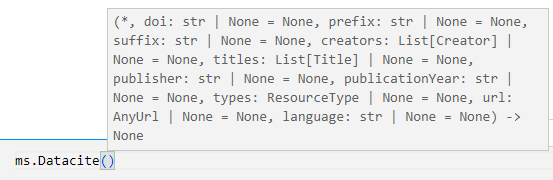